<p><img alt="Colaboratory logo" height="65px" src="https://upload.wikimedia.org/wikipedia/en/thumb/b/b1/Davivienda_logo.svg/1200px-Davivienda_logo.svg.png" align="left" hspace="10px" width="20%" vspace="15px"></p>

<h1 align="center"> Prueba Técnica Profesional III Departamento de Datos no Estructurados  </h1>


<p style=»text-align: justify;»>
El Departamento de Analítica No estructurada busca profesionales con fuertes capacidades técnicas y sobretodo una fuerte capacidad analítica. Por consiguiente esta prueba intenta poner a prueba la forma en la que plantea y soluciona problmeas. Es importante que presente el código que usa para resolver el problema con el único motivo de medir sus capacidades.

Se recomienda que sea ordenado en su código y siga los lineamientos establecidos, aún así la prueba tiene un grado de flexibilidad. Se evaluará el orden y la creatividad a la hora de presentar la información. 
</p>


**Nota** <br>
Tenga en cuneta que éste ejercicio es hipotético y el banco no usará su trabajo más que para evaluar sus habiliadades para el cargo


#### **Objetivo**
El objetivo de esta prueba es lograr un filtro que discrimine automáticamente un tipo de documento sin información relevante: páginas en blanco. Se busca que este filtro reciba como entrada una carpeta con imágenes de documentos diversos y produzca como salida dos carpetas, una con imágenes de páginas en blanco y otra con imágenes de páginas con contenido.

Páginas con solo el membrete del documento se consideran páginas en blanco, así como las que, al momento de ser escaneadas, alcanzan a reflejar contenido ininteligible del reverso de la página.

## Clasificación de Imágenes

### Importe las imágenes
En la carpeta adjunta se encontrará con documentos tanto en blanco como con contenido. Su objetivo es generar un modelo que clasifique los elementos en "Con Contenido" y "Sin Contenido". Para eso puede utilizar reglas o modelos especificos.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from os import listdir
from os.path import isfile, join

In [ ]:
blanco_path = '/content/drive/MyDrive/PERSONAL/PRUEBAS DAVI/Prueba_conocimientos_davivienda/Ejercicio_1_Imagenes/Datasets/Blanco/'
doc_path = '/content/drive/MyDrive/PERSONAL/PRUEBAS DAVI/Prueba_conocimientos_davivienda/Ejercicio_1_Imagenes/Datasets/Documentos/'

blanco_file_list = [f for f in listdir(blanco_path) if isfile(join(blanco_path, f))]
doc_file_list = [f for f in listdir(doc_path) if isfile(join(doc_path, f))]

In [ ]:
print('blanco', len(blanco_file_list),blanco_file_list[:5])
print('documentos', len(doc_file_list),doc_file_list[:5])

blanco 147 ['page-185.png', 'page-179.png', 'page-163.png', 'page-168.png', 'page-161.png']
documentos 100 ['page-11.png', 'page-3.png', 'page-23.png', 'page-28.png', 'page-35.png']


### Estructure la información
Debido a que las imagenes son archivos separados lo primero que debe hacer es importarlas (recuerde que una imagen es esencialmente un arreglo de vectores), puede esturcturarlas a su gusto y marcar de ser necesario aquellas que va usar como test de pruebas. 

In [ ]:
from tqdm import tqdm

import numpy as np
import cv2

import matplotlib.pyplot as plt

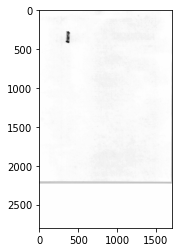

In [ ]:
img = cv2.imread(blanco_path+blanco_file_list[70], 0)#0-255
plt.imshow(img, cmap='gray')

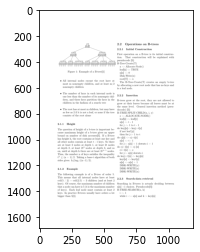

In [ ]:
img1 = cv2.imread(doc_path+doc_file_list[99], 0)#0-255
plt.imshow(img1, cmap='gray')

# Processing


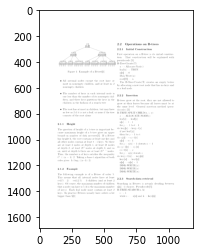

In [ ]:
img = cv2.medianBlur(img1, 3)
plt.imshow(img, cmap='gray')

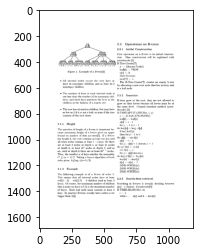

In [ ]:
th = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 9, 7)
plt.imshow(th, cmap='gray')

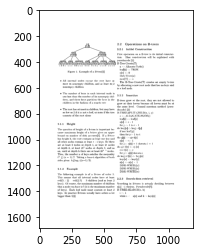

In [ ]:
thh = th/255.
plt.imshow(thh, cmap='gray')

In [ ]:
img_tot = thh.shape[0]*thh.shape[1]
white_pix = thh.sum()
wr = white_pix/img_tot
wr

0.9581336468485933

In [ ]:
white_pix = thh.sum()
white_pix

1921675.0

In [ ]:
def get_doc_ratio(data_path, file_name_list):
  doc_ratio_list = []
  for x in tqdm(range(0, len(file_name_list))):
    img = cv2.imread(data_path+file_name_list[x], 0)#0-255
    img = cv2.medianBlur(img, 3)
    th = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 9, 7)
    #==================================================================
    thh = th/255.
    img_tot = thh.shape[0]*thh.shape[1]
    white_pix = thh.sum()
    wr = white_pix/img_tot
    br = 1-wr
    doc_ratio_list.append((data_path+file_name_list[x], round(br, 2)))
  return doc_ratio_list

In [ ]:
br_list_w = get_doc_ratio(blanco_path, blanco_file_list)
br_list_doc = get_doc_ratio(doc_path, doc_file_list)

100%|██████████| 100/100 [00:05<00:00, 19.03it/s]


In [ ]:
full_data = br_list_w+br_list_doc

In [ ]:
labels = []

for x in full_data:
  if x[1]>=0.02:
    labels.append((x[0], 1))#Es documento
  else:
    labels.append((x[0], 0))#Es blanco

# Model performance - Only filters



In [ ]:
y_true = []

for yt in blanco_file_list:
  y_true.append((blanco_path+yt, 0))
for yt in doc_file_list:
  y_true.append((doc_path+yt, 1))

In [ ]:
y_true_l = sorted(y_true, key=lambda x: x[0])
y_pred_l = sorted(labels, key=lambda x: x[0])

In [ ]:
y_true_l[:3]

[('/content/drive/MyDrive/PERSONAL/PRUEBAS DAVI/Prueba_conocimientos_davivienda/Ejercicio_1_Imagenes/Datasets/Blanco/page-156.png',
  0),
 ('/content/drive/MyDrive/PERSONAL/PRUEBAS DAVI/Prueba_conocimientos_davivienda/Ejercicio_1_Imagenes/Datasets/Blanco/page-157.png',
  0),
 ('/content/drive/MyDrive/PERSONAL/PRUEBAS DAVI/Prueba_conocimientos_davivienda/Ejercicio_1_Imagenes/Datasets/Blanco/page-158.png',
  0)]

In [ ]:
y_pred_l[:3]

[('/content/drive/MyDrive/PERSONAL/PRUEBAS DAVI/Prueba_conocimientos_davivienda/Ejercicio_1_Imagenes/Datasets/Blanco/page-156.png',
  0),
 ('/content/drive/MyDrive/PERSONAL/PRUEBAS DAVI/Prueba_conocimientos_davivienda/Ejercicio_1_Imagenes/Datasets/Blanco/page-157.png',
  0),
 ('/content/drive/MyDrive/PERSONAL/PRUEBAS DAVI/Prueba_conocimientos_davivienda/Ejercicio_1_Imagenes/Datasets/Blanco/page-158.png',
  0)]

In [ ]:
#Convertir las clasificaciones y_true y y_pred a listas 
y_true_l_val = [x[1] for x in y_true_l]
y_pred_l_val = [x[1] for x in y_pred_l]
print(y_true_l_val[:10])
print(y_pred_l_val[:10])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


### 4. Interpretación de Resultados
<p>Al final tiene que presentar la información en una matriz que muestre la calidad de su clasificación y evaluarla con la medida que guste. </p>
<br>

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix

import seaborn as sns

In [ ]:
print(f"La exactitud del clasificador por filtro es: {round(accuracy_score(y_true_l_val, y_pred_l_val),4)}")

La exactitud del clasificador por filtro es: 0.9757


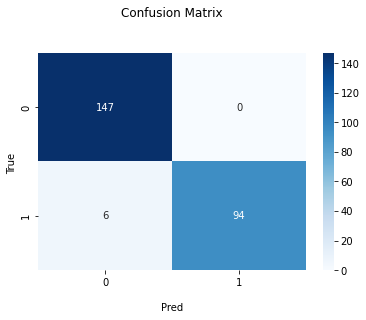

In [ ]:
"""
blanco (0) 147 
documentos (1) 100
"""
cm = confusion_matrix(y_true_l_val, y_pred_l_val)
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPred')
ax.set_ylabel('True ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])
## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
print(":)")

:)
